In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and cleaning data

In [2]:
df = pd.read_csv('nurse_plant_temperatures_all_locations.csv', index_col = 0)

In [3]:
df.time = pd.to_datetime(df.time)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77946 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      77946 non-null  datetime64[ns]
 1   temp      77946 non-null  float64       
 2   sensor    77946 non-null  object        
 3   plant     77946 non-null  object        
 4   location  77946 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.6+ MB


In [5]:
df['month'] = df.time.dt.month
df['hour'] = df.time.dt.hour 
df['minute'] = df.time.dt.minute

In [6]:
df.minute.value_counts()

minute
0     66790
30    11155
20        1
Name: count, dtype: int64

In [7]:
df = pd.DataFrame(df[df.minute == 0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66790 entries, 5 to 3997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      66790 non-null  datetime64[ns]
 1   temp      66790 non-null  float64       
 2   sensor    66790 non-null  object        
 3   plant     66790 non-null  object        
 4   location  66790 non-null  object        
 5   month     66790 non-null  int32         
 6   hour      66790 non-null  int32         
 7   minute    66790 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 3.8+ MB


In [8]:
df.drop(columns = 'minute', inplace = True)

In [9]:
df.reset_index(drop = True, inplace = True)

In [10]:
total_mean_df = df.groupby(['plant', 'hour']).temp.mean().reset_index()

In [11]:
means_df = df.groupby('plant').temp.mean().reset_index()
means_df.rename(columns = {'temp' : 'mean_temp'}, inplace = True)

In [12]:
total_df = total_mean_df.merge(means_df, left_on = 'plant', right_on = 'plant')
total_df['adjusted_mean'] = total_df.temp - total_df.mean_temp

In [13]:
total_df.head()

,plant,hour,temp,mean_temp,adjusted_mean
0,A. deltoidea,0,18.965978,22.105414,-3.139436
1,A. deltoidea,1,18.389043,22.105414,-3.716371
2,A. deltoidea,2,17.790569,22.105414,-4.314846
3,A. deltoidea,3,17.249237,22.105414,-4.856177
4,A. deltoidea,4,16.675694,22.105414,-5.429720


# Data Visualization

## All months and locations combined

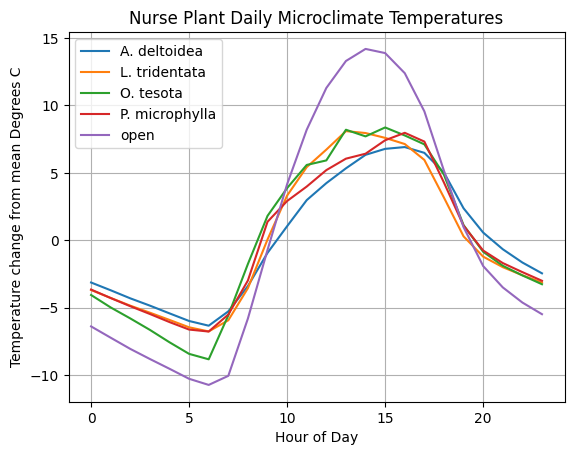

In [14]:
plt.plot(total_df[total_df.plant == 'A. deltoidea'].hour, total_df[total_df.plant == 'A. deltoidea'].adjusted_mean, label = 'A. deltoidea')
plt.plot(total_df[total_df.plant == 'L. tridentata'].hour, total_df[total_df.plant == 'L. tridentata'].adjusted_mean, label = 'L. tridentata')
plt.plot(total_df[total_df.plant == 'O. tesota'].hour, total_df[total_df.plant == 'O. tesota'].adjusted_mean, label = 'O. tesota')
plt.plot(total_df[total_df.plant == 'P. microphylla'].hour, total_df[total_df.plant == 'P. microphylla'].adjusted_mean, label = 'P. microphylla')
plt.plot(total_df[total_df.plant == 'open'].hour, total_df[total_df.plant == 'open'].adjusted_mean, label = 'open')
plt.legend()
plt.grid()
plt.ylabel('Temperature change from mean Degrees C')
plt.xlabel('Hour of Day')
plt.title('Nurse Plant Daily Microclimate Temperatures')
plt.show()

## By location

In [15]:
loc_df = df.groupby(['location', 'plant', 'hour']).temp.mean().reset_index()

In [16]:
loc_df.head()

,location,plant,hour,temp
0,Cottonwood Creek,A. deltoidea,0,31.114286
1,Cottonwood Creek,A. deltoidea,1,29.977143
2,Cottonwood Creek,A. deltoidea,2,28.840952
3,Cottonwood Creek,A. deltoidea,3,27.875238
4,Cottonwood Creek,A. deltoidea,4,26.929524


In [17]:
loc_df.shape

(384, 4)

In [18]:
loc_means = loc_df.groupby(['location', 'plant']).temp.mean().reset_index()
loc_means.rename(columns = {'temp' : 'mean_temp'}, inplace = True)
loc_means.head()

,location,plant,mean_temp
0,Cottonwood Creek,A. deltoidea,36.945754
1,Cottonwood Creek,P. microphylla,35.929286
2,Cottonwood Creek,open,38.493452
3,White Tank Mountains,A. deltoidea,30.153144
4,White Tank Mountains,L. tridentata,30.246831


In [19]:
loc_df = loc_df.merge(loc_means, left_on = ['location', 'plant'], right_on = ['location', 'plant'])

In [20]:
loc_df['temp_diff'] = loc_df.temp - loc_df.mean_temp

In [21]:
loc_df.location.value_counts()

location
White Tank Mountains    120
black canyon             96
wickenburg               96
Cottonwood Creek         72
Name: count, dtype: int64

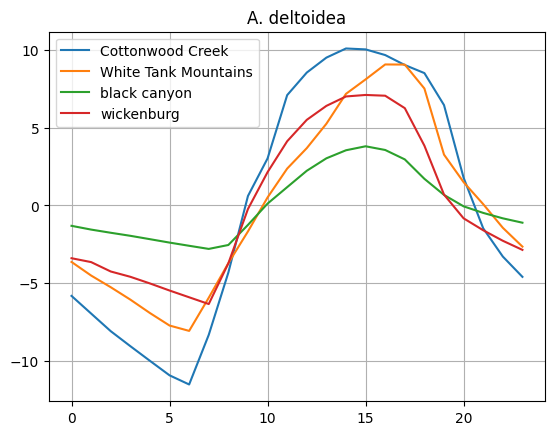

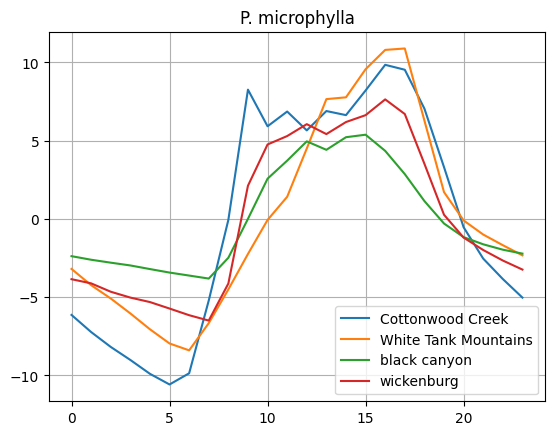

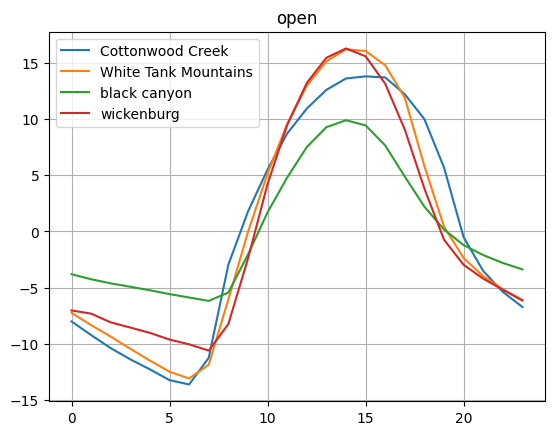

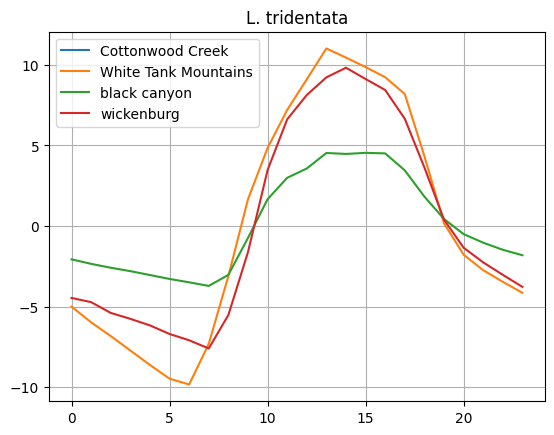

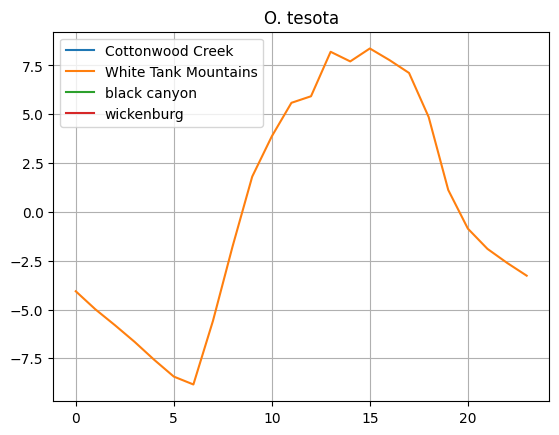

In [22]:
for j in loc_df.plant.unique():
    for i in loc_df.location.unique():
        plt.plot(loc_df[(loc_df.plant == j) & (loc_df.location == i)].hour , loc_df[(loc_df.plant == j) & (loc_df.location == i)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

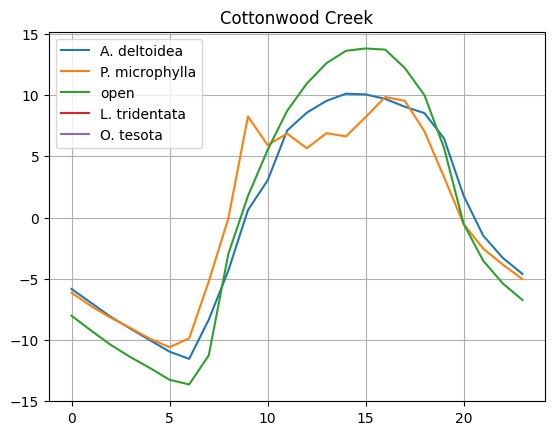

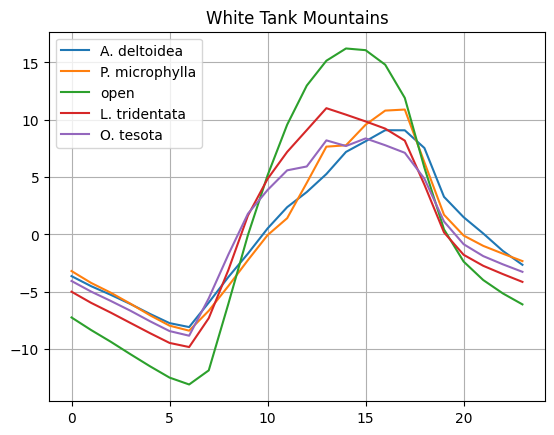

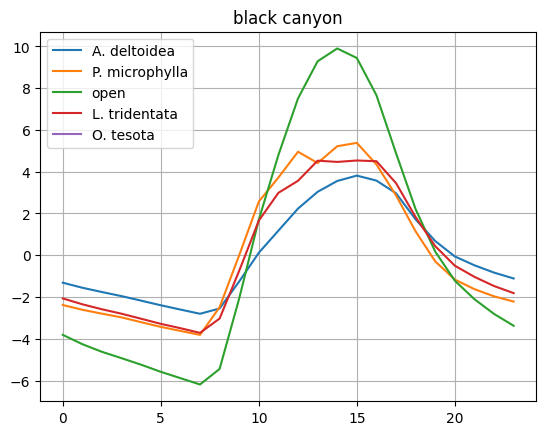

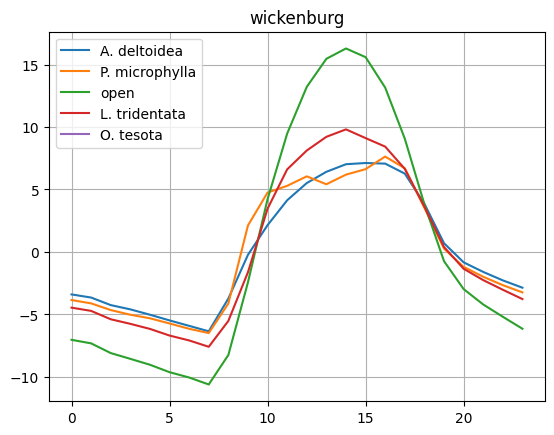

In [23]:
for j in loc_df.location.unique():
    for i in loc_df.plant.unique():
        plt.plot(loc_df[(loc_df.plant == i) & (loc_df.location == j)].hour , loc_df[(loc_df.plant == i) & (loc_df.location == j)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

In [24]:
for i in df.location.unique():
    print(i, 'first time:', df[df.location == i].time.min(), 'Last time:', df[df.location == i].time.max())
    print()

black canyon first time: 2023-01-02 16:00:00 Last time: 2023-03-25 00:00:00

Cottonwood Creek first time: 2025-06-07 08:00:00 Last time: 2025-07-12 08:00:00

wickenburg first time: 2022-02-12 13:00:00 Last time: 2022-03-15 16:00:00

White Tank Mountains first time: 2022-03-18 00:00:00 Last time: 2022-06-09 00:00:00



In [25]:
df.time.dt.dayofyear.nunique()

192

In [26]:
 df[df.temp == df.temp.max()]

,time,temp,sensor,plant,location,month,hour
42875,2022-06-08 13:00:00,68.6,open2,open,White Tank Mountains,6,13


In [27]:
 df[df.temp == df.temp.min()]

,time,temp,sensor,plant,location,month,hour
27370,2022-02-24 07:00:00,-1.0,open1,open,wickenburg,2,7
28114,2022-02-24 07:00:00,-1.0,open2,open,wickenburg,2,7


## Summer vs. winter

In [28]:
winter = pd.DataFrame(df[df.month.isin([1, 2])])
summer = pd.DataFrame(df[df.month.isin([5, 6, 7])])
#summer = pd.DataFrame(df[(df.month.isin([5, 6, 7])) & (df.location == 'White Tank Mountains')])
#summer = pd.DataFrame(df[(df.month.isin([5, 6, 7])) & (df.location == 'Cottonwood Creek')])

In [29]:
summer.shape

(20575, 7)

In [30]:
winter.shape

(20031, 7)

In [31]:
w_mean = winter.temp.mean()
s_mean = summer.temp.mean()

In [32]:
summer_means = summer.groupby(['plant', 'hour']).temp.mean().reset_index()
winter_means = winter.groupby(['plant', 'hour']).temp.mean().reset_index()

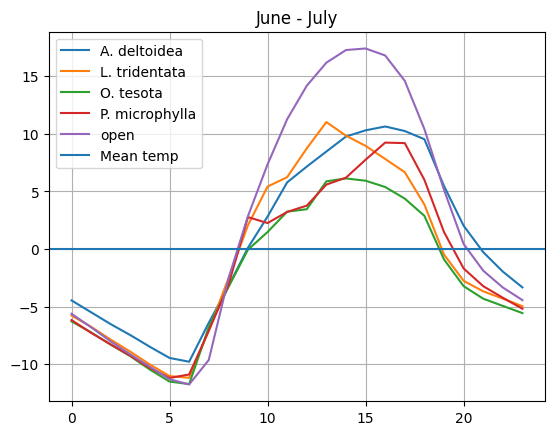

In [33]:
for i in summer_means.plant.unique(): 
    plt.plot(summer_means[summer_means.plant == i].hour, summer_means[summer_means.plant == i].temp - s_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('June - July')
plt.legend()
plt.show()

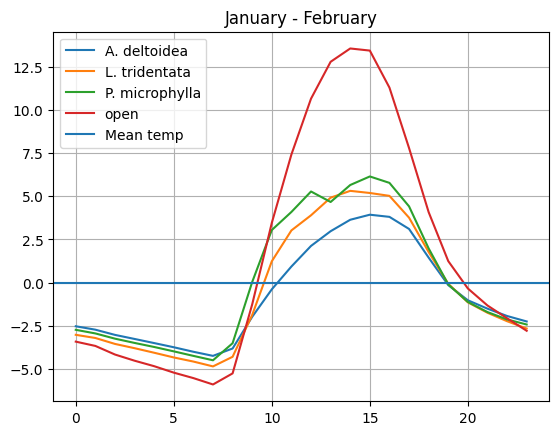

In [34]:
for i in winter_means.plant.unique(): 
    plt.plot(winter_means[winter_means.plant == i].hour, winter_means[winter_means.plant == i].temp - w_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('January - February')
plt.legend()
plt.show()

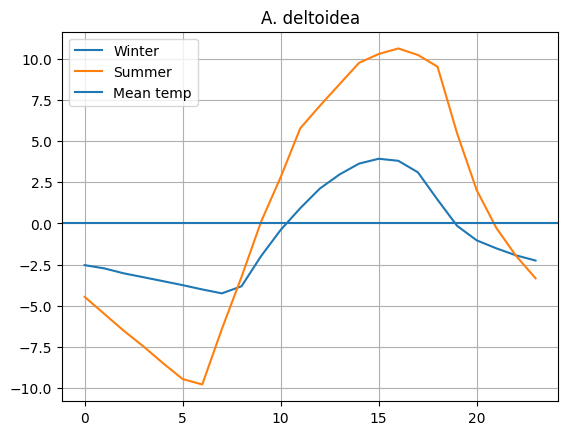

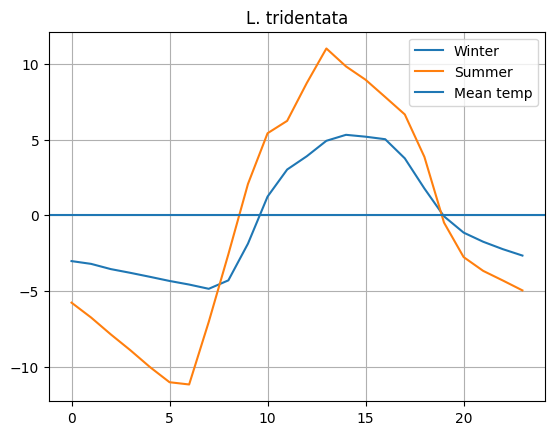

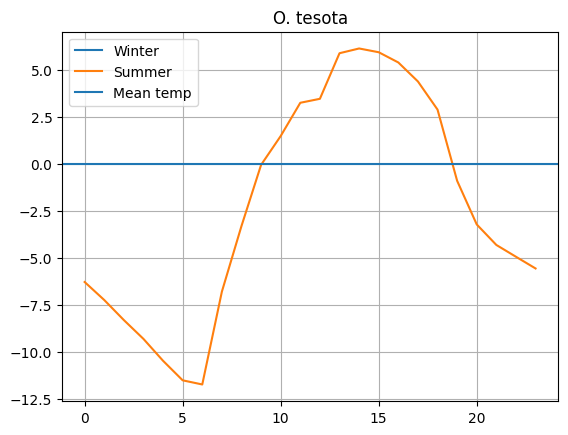

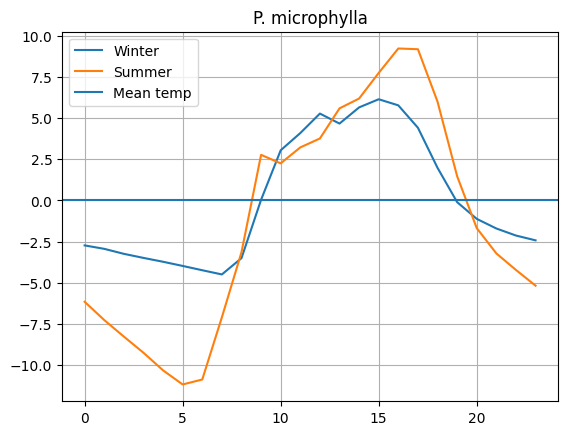

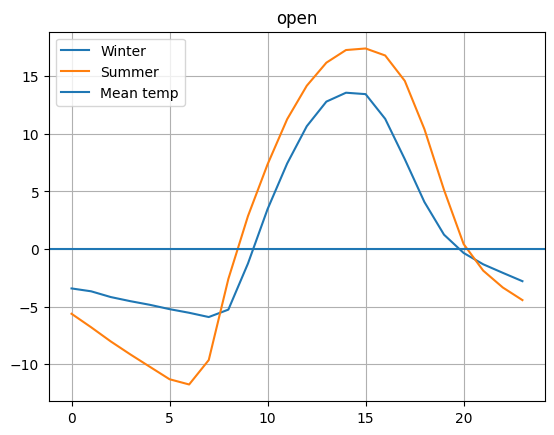

In [35]:
for i in summer_means.plant.unique(): 
    plt.plot(winter_means[winter_means.plant == i].hour, winter_means[winter_means.plant == i].temp - w_mean, label = 'Winter')
    plt.plot(summer_means[summer_means.plant == i].hour, summer_means[summer_means.plant == i].temp - s_mean, label = 'Summer')
    plt.grid()
    plt.axhline(0, label = 'Mean temp')
    plt.title(i)
    plt.legend()
    plt.show()

In [36]:
summer_open = summer_means[summer_means.plant == 'open'][['hour', 'temp']]
winter_open = winter_means[winter_means.plant == 'open'][['hour', 'temp']]

In [37]:
summer_open.rename(columns = {'temp' : 'open_temp'}, inplace = True)
winter_open.rename(columns = {'temp' : 'open_temp'}, inplace = True)

In [38]:
summer_diffs = summer_means.merge(summer_open, left_on = 'hour', right_on = 'hour', how = 'left')
winter_diffs = winter_means.merge(winter_open, left_on = 'hour', right_on = 'hour', how = 'left')

In [39]:
summer_diffs['diff_from_open'] = summer_diffs.temp - summer_diffs.open_temp
winter_diffs['diff_from_open'] = winter_diffs.temp - winter_diffs.open_temp

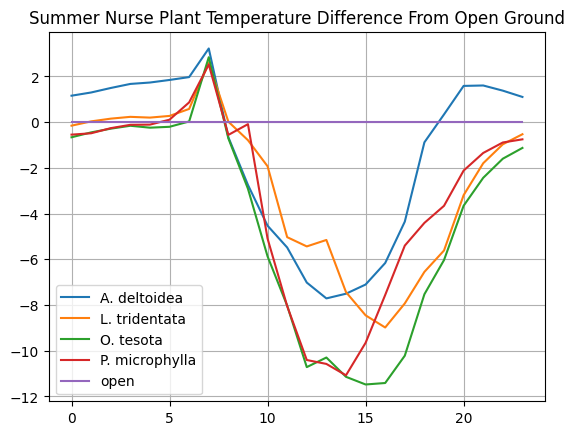

In [40]:
for i in summer_diffs.plant.unique():
    plt.plot(summer_diffs[summer_diffs.plant == i].hour, summer_diffs[summer_diffs.plant == i].diff_from_open, label = i)
plt.grid()
plt.title('Summer Nurse Plant Temperature Difference From Open Ground')
plt.legend()
plt.show()

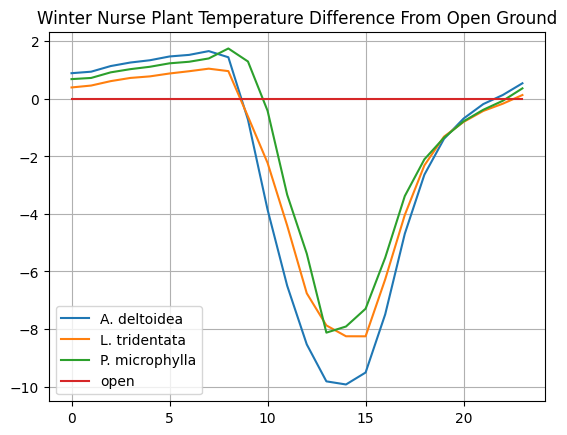

In [41]:
for i in winter_diffs.plant.unique():
    plt.plot(winter_diffs[winter_diffs.plant == i].hour, winter_diffs[winter_diffs.plant == i].diff_from_open, label = i)
plt.grid()
plt.title('Winter Nurse Plant Temperature Difference From Open Ground')
plt.legend()
plt.show()

# Statistical analysis

In [42]:
df['day_of_year'] = df.time.dt.dayofyear

In [43]:
max_df = df.groupby(['plant', 'location', 'day_of_year']).temp.max().reset_index()
min_df = df.groupby(['plant', 'location', 'day_of_year']).temp.min().reset_index()

In [44]:
max_df.rename(columns = {'temp' : 'max_temp'}, inplace = True)
min_df.rename(columns = {'temp' : 'min_temp'}, inplace = True)

In [45]:
stats_df = max_df.merge(min_df, left_on = ['plant', 'location', 'day_of_year'], right_on = ['plant', 'location', 'day_of_year'])
stats_df.shape

(988, 5)

In [46]:
stats_df['temp_range'] = stats_df.max_temp - stats_df.min_temp

In [47]:
open_temps = pd.DataFrame(stats_df[stats_df.plant == 'open'])
open_temps.rename(columns = {'max_temp' : 'open_max_temp', 'min_temp' : 'open_min_temp', 'temp_range' : 'open_temp_range'}, inplace = True)
open_temps.drop(columns = 'plant', inplace = True)

In [48]:
stats_df = stats_df.merge(open_temps, on = ['location', 'day_of_year'])
stats_df.shape

(988, 9)

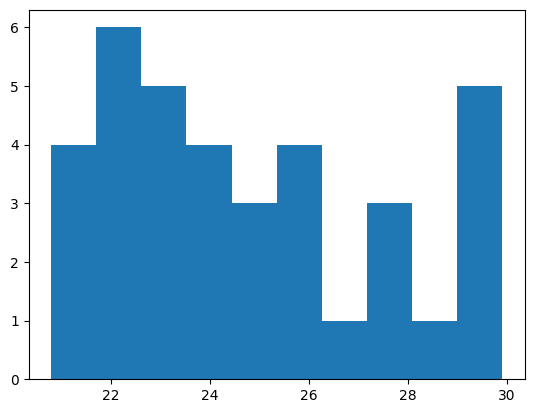

In [49]:
plt.hist(stats_df[(stats_df.location == 'Cottonwood Creek') & (stats_df.plant == 'A. deltoidea')].min_temp)
plt.show()

When checked, nearly all data has a non-normal distribution so non-parametric tests will be used.  Will do 10,000 permutations of comparing nurse plant temps to open temps.  

In [50]:
print('Max daily temperatures difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['open_max_temp'] - stats_df[stats_df.plant == i]['max_temp']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Max daily temperatures difference between nurse plant to open
A. deltoidea observed mean difference from open: 8.0081 P-value: 0.00000000
L. tridentata observed mean difference from open: 4.3372 P-value: 0.00000000
O. tesota observed mean difference from open: 9.7179 P-value: 0.00000000
P. microphylla observed mean difference from open: 6.2851 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


In [51]:
print('Minimum daily temperatures difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['min_temp'] - stats_df[stats_df.plant == i]['open_min_temp']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Minimum daily temperatures difference between nurse plant to open
A. deltoidea observed mean difference from open: 1.5804 P-value: 0.00000000
L. tridentata observed mean difference from open: 0.7196 P-value: 0.00000000
O. tesota observed mean difference from open: 1.6560 P-value: 0.00000000
P. microphylla observed mean difference from open: 0.5945 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


In [52]:
print('Daily temperature range difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['open_temp_range'] - stats_df[stats_df.plant == i]['temp_range']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Daily temperature range difference between nurse plant to open
A. deltoidea observed mean difference from open: 9.5885 P-value: 0.00000000
L. tridentata observed mean difference from open: 5.0568 P-value: 0.00000000
O. tesota observed mean difference from open: 11.3738 P-value: 0.00000000
P. microphylla observed mean difference from open: 6.8796 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


# Model imputation

In [53]:
wide_df = df[df.plant == 'open'].groupby(['day_of_year', 'hour']).temp.mean().reset_index()
wide_df.rename(columns = {'temp' : 'open_temp'}, inplace = True)

for i in ['L. tridentata', 'A. deltoidea', 'P. microphylla', 'O. tesota']: 
    temp_df = df[df.plant == i].groupby(['day_of_year', 'hour']).temp.mean().reset_index()
    temp_df.rename(columns = {'temp' : (i + '_temp')}, inplace = True) 
    wide_df = wide_df.merge(temp_df, left_on = ['day_of_year', 'hour'], right_on = ['day_of_year', 'hour'], how = 'left')

In [54]:
wide_df.head()

,day_of_year,hour,open_temp,L. tridentata_temp,A. deltoidea_temp,P. microphylla_temp,O. tesota_temp
0,2,16,13.60,12.166667,11.833333,11.45,NaN
1,2,17,11.70,11.133333,11.166667,10.50,NaN
2,2,18,10.00,9.966667,10.200000,9.50,NaN
3,2,19,9.00,9.233333,9.600000,8.90,NaN
4,2,20,8.25,8.666667,9.133333,8.40,NaN


In [55]:
wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_year          4577 non-null   int32  
 1   hour                 4577 non-null   int32  
 2   open_temp            4577 non-null   float64
 3   L. tridentata_temp   3777 non-null   float64
 4   A. deltoidea_temp    4577 non-null   float64
 5   P. microphylla_temp  4576 non-null   float64
 6   O. tesota_temp       1993 non-null   float64
dtypes: float64(5), int32(2)
memory usage: 214.7 KB


In [56]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [57]:
# Initialize IterativeImputer with a regressor (e.g., BayesianRidge)
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

# Fit and transform the data
X_imputed = imputer.fit_transform(wide_df)

In [58]:
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = wide_df.columns

In [59]:
X_imputed.tail()

,day_of_year,hour,open_temp,L. tridentata_temp,A. deltoidea_temp,P. microphylla_temp,O. tesota_temp
4572,193.0,4.0,29.400000,30.409976,29.800000,29.633333,30.911287
4573,193.0,5.0,28.633333,29.720504,29.133333,29.033333,30.441892
4574,193.0,6.0,28.233333,29.271129,28.700000,29.433333,30.313334
4575,193.0,7.0,29.533333,30.524129,30.466667,32.333333,31.558637
4576,193.0,8.0,34.800000,34.244076,33.166667,31.948316,33.951104


In [60]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_year          4577 non-null   float64
 1   hour                 4577 non-null   float64
 2   open_temp            4577 non-null   float64
 3   L. tridentata_temp   4577 non-null   float64
 4   A. deltoidea_temp    4577 non-null   float64
 5   P. microphylla_temp  4577 non-null   float64
 6   O. tesota_temp       4577 non-null   float64
dtypes: float64(7)
memory usage: 250.4 KB


In [61]:
winter = pd.DataFrame(X_imputed[X_imputed.day_of_year <= 60])
summer = pd.DataFrame(X_imputed[X_imputed.day_of_year >= 133])

In [62]:
day_winter = winter.groupby('hour').mean()
day_summer = summer.groupby('hour').mean()
day_winter.drop(columns = 'day_of_year', inplace = True)
day_summer.drop(columns = 'day_of_year', inplace = True)

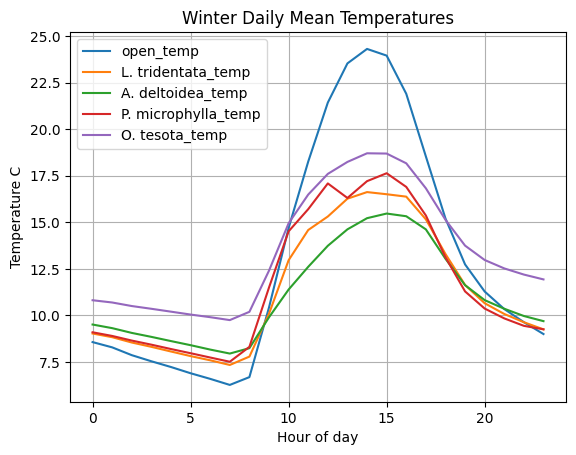

In [63]:
for i in day_winter.columns:
    plt.plot(day_winter.index, day_winter[i], label = i)
plt.grid()
plt.title('Winter Daily Mean Temperatures')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()

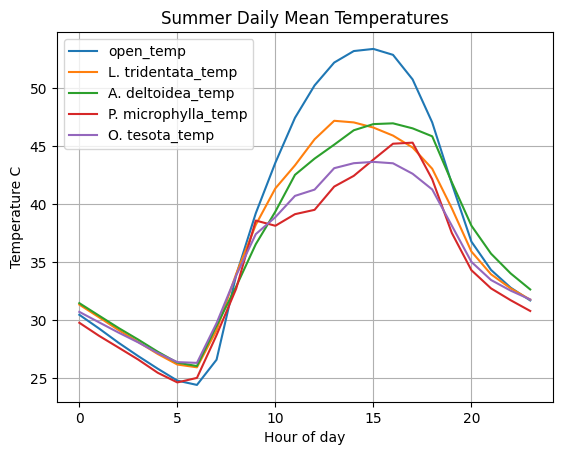

In [64]:
for i in day_summer.columns:
    plt.plot(day_summer.index, day_summer[i], label = i)
plt.grid()
plt.title('Summer Daily Mean Temperatures')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()